In [ ]:
# !curl -o dataset.zip https://www.bbci.de/competition/download/competition_iv/BCICIV_2a_gdf.zip
!unzip '/content/drive/MyDrive/Copy of BCICIV_2a_gdf.zip' -d ./dataset


Archive:  /content/drive/MyDrive/Copy of BCICIV_2a_gdf.zip
  inflating: ./dataset/A01E.gdf      
  inflating: ./dataset/A01T.gdf      
  inflating: ./dataset/A02E.gdf      
  inflating: ./dataset/A02T.gdf      
  inflating: ./dataset/A03E.gdf      
  inflating: ./dataset/A03T.gdf      
  inflating: ./dataset/A04E.gdf      
  inflating: ./dataset/A04T.gdf      
  inflating: ./dataset/A05E.gdf      
  inflating: ./dataset/A05T.gdf      
  inflating: ./dataset/A06E.gdf      
  inflating: ./dataset/A06T.gdf      
  inflating: ./dataset/A07E.gdf      
  inflating: ./dataset/A07T.gdf      
  inflating: ./dataset/A08E.gdf      
  inflating: ./dataset/A08T.gdf      
  inflating: ./dataset/A09E.gdf      
  inflating: ./dataset/A09T.gdf      


In [ ]:
!pip install -q mne


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 37.4 MB/s eta 0:00:00


In [ ]:
import mne

concatenated_raw = mne.io.read_raw_gdf('./dataset/A01T.gdf', preload=True,stim_channel='auto')
events, event_id = mne.events_from_annotations(concatenated_raw)
# print(event_id)


# print(events)



Extracting EDF parameters from /content/dataset/A01T.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG-Fz, EEG, EEG, EEG, EEG, EEG, EEG, EEG-C3, EEG, EEG-Cz, EEG, EEG-C4, EEG, EEG, EEG, EEG, EEG, EEG, EEG, EEG-Pz, EEG, EEG, EOG-left, EOG-central, EOG-right
Creating raw.info structure...
Reading 0 ... 672527  =      0.000 ...  2690.108 secs...


/usr/lib/python3.10/contextlib.py:142: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


Used Annotations descriptions: ['1023', '1072', '276', '277', '32766', '768', '769', '770', '771', '772']


In [ ]:
import mne

dataset_directory = './dataset/'
subject_files = [f'A0{i}T.gdf' for i in range(1, 3)]
raws = []


for file in subject_files:
    file_path = dataset_directory + file
    raw = mne.io.read_raw_gdf(file_path, preload=True, stim_channel='auto')
    raws.append(raw)

concatenated_raw = mne.concatenate_raws(raws)




Extracting EDF parameters from /content/dataset/A01T.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG-Fz, EEG, EEG, EEG, EEG, EEG, EEG, EEG-C3, EEG, EEG-Cz, EEG, EEG-C4, EEG, EEG, EEG, EEG, EEG, EEG, EEG, EEG-Pz, EEG, EEG, EOG-left, EOG-central, EOG-right
Creating raw.info structure...
Reading 0 ... 672527  =      0.000 ...  2690.108 secs...


/usr/lib/python3.10/contextlib.py:142: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


Extracting EDF parameters from /content/dataset/A02T.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG-Fz, EEG, EEG, EEG, EEG, EEG, EEG, EEG-C3, EEG, EEG-Cz, EEG, EEG-C4, EEG, EEG, EEG, EEG, EEG, EEG, EEG, EEG-Pz, EEG, EEG, EOG-left, EOG-central, EOG-right
Creating raw.info structure...
Reading 0 ... 677168  =      0.000 ...  2708.672 secs...


/usr/lib/python3.10/contextlib.py:142: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


In [ ]:
channel_names_mapping = {
    'EEG-0': 'FC3',
    'EEG-1': 'FC1',
    'EEG-2': 'FCz',
    'EEG-3': 'FC2',
    'EEG-4': 'FC4',
    'EEG-5': 'C5',
    'EEG-6': 'C1',
    'EEG-7': 'C2',  # Often corresponds to T7 in the extended 10-20 system
    'EEG-8': 'C6',
    'EEG-9': 'CP3',
    'EEG-10': 'CP1',
    'EEG-11': 'CPz',  # Often corresponds to T8 in the extended 10-20 system
    'EEG-12': 'CP2',  # Often corresponds to P7 in the extended 10-20 system
    'EEG-13': 'CP4',
    'EEG-14': 'P1',
    'EEG-15': 'P2',
    'EEG-16': 'POz',  # Often corresponds to P8 in the extended 10-20 system
    'EEG-C3': 'C3',  # C3 does not need to be remapped
    'EEG-Cz': 'Cz',  # Cz does not need to be remapped
    'EEG-C4': 'C4',  # C4 does not need to be remapped
    'EEG-Pz': 'Pz',  # Pz does not need to be remapped
    'EEG-Fz': 'Fz',  # Fz does not need to be remapped

}
# The following electrodes have overlapping positions, which causes problems during visualization:
# Fc3, CPZ, TOz, EOG-0, EOG-1, EOG-2

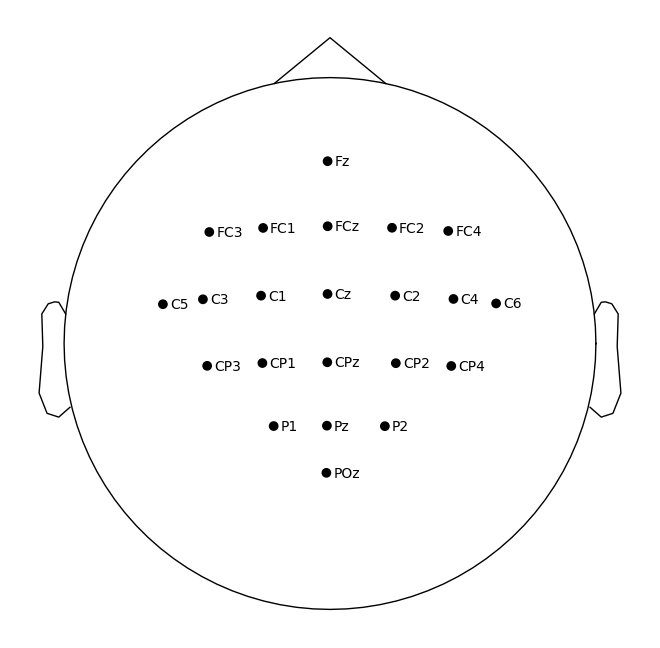

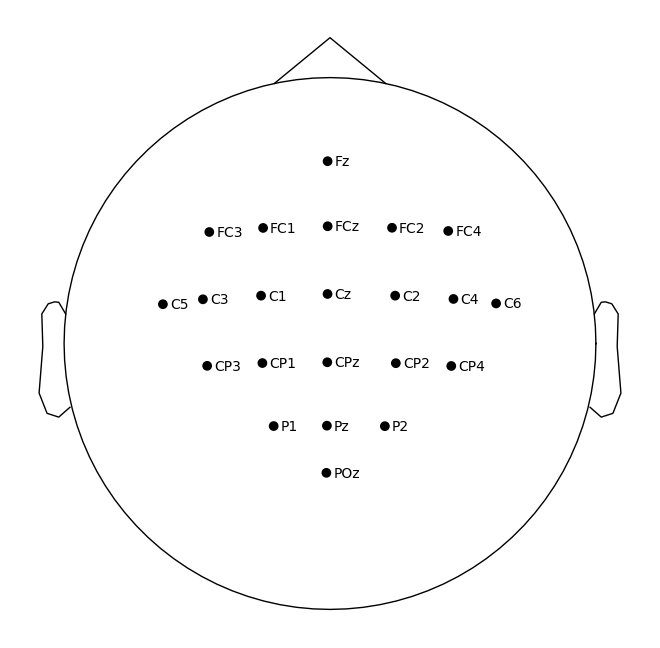

In [ ]:
# Apply the renaming
concatenated_raw .rename_channels(channel_names_mapping)
concatenated_raw .set_channel_types({
    'EOG-left': 'eog',
    'EOG-central': 'eog',
    'EOG-right': 'eog'
})

# Set the standard montage
montage = mne.channels.make_standard_montage('standard_1020')
concatenated_raw .set_montage(montage, on_missing='ignore')

# Verify the montage application
concatenated_raw .plot_sensors(show_names=True)


In [ ]:
concatenated_raw .get_data

<bound method get_data of <RawGDF | A01T.gdf, 25 x 1349697 (5398.8 s), ~257.5 MB, data loaded>>

In [ ]:
import mne
from mne.preprocessing import ICA
from mne.datasets import eegbci
import matplotlib.pyplot as plt
import numpy as np
# plt.ion()

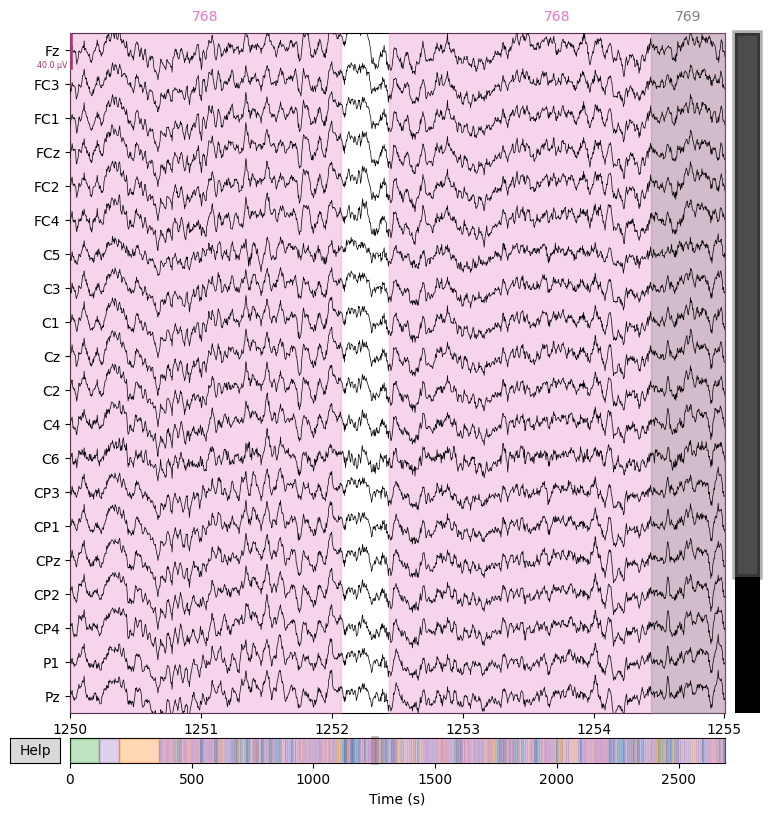

NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 8.192 (s)
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 32 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 7.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 6.00 Hz)
- Upper passband edge: 32.00 Hz
- Upper transition bandwidth: 8.00 Hz (-6 dB cutoff frequency: 36.00 Hz)
- Filter length: 413 samples (1.652 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.4s


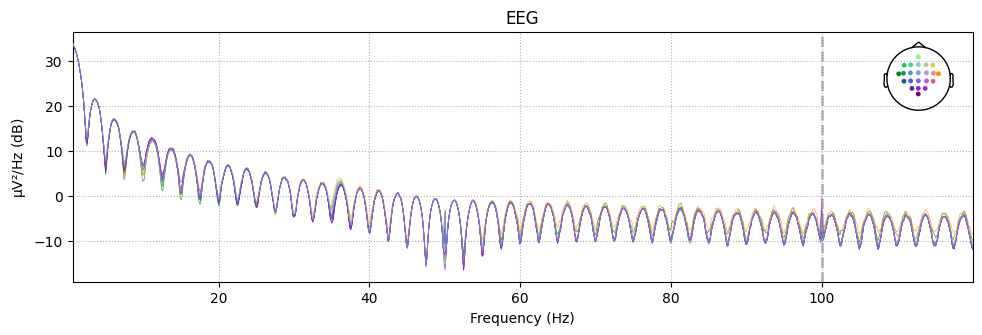

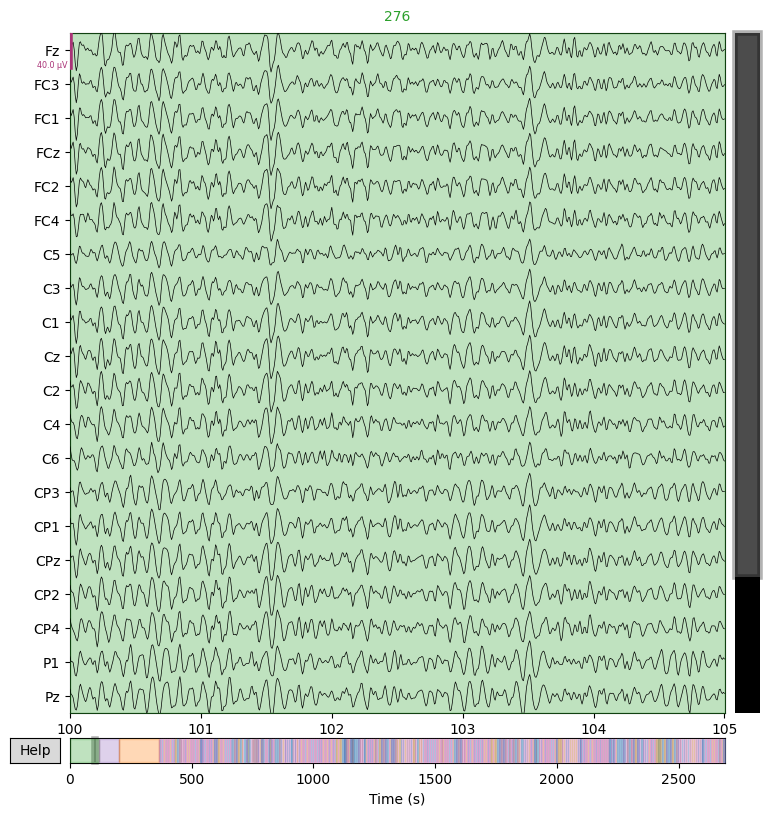

NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 8.192 (s)


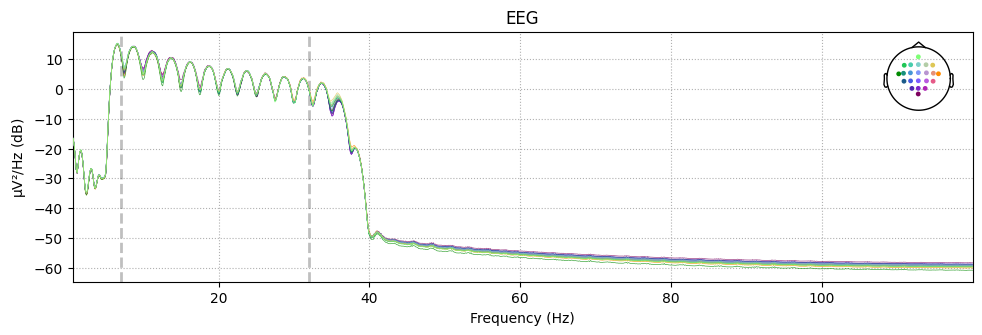

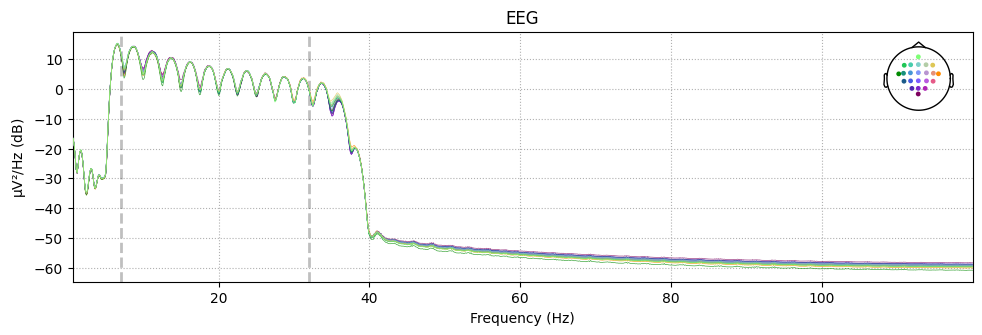

In [ ]:
# Plot the raw data for a duration of 5 seconds starting from 100 seconds
concatenated_raw.plot(duration=5, start=250*5)

# Compute and plot the PSD of the raw data
concatenated_raw.plot_psd(fmin=0.5, fmax=120, spatial_colors=True)

# # Filter the data between 7 and 32 Hz
raw_fil = concatenated_raw.copy().filter(7., 32., fir_design='firwin', skip_by_annotation='edge')

# Visualize the filtered data for a duration of 5 second|s starting from 100 seconds
raw_fil.plot(duration=5, start=100)

# # Compute and plot the PSD of the filtered data
raw_fil.plot_psd(fmin=0.5, fmax=120, spatial_colors=True)


Fitting ICA to data using 22 channels (please be patient, this may take a while)
Selecting by number: 22 components


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:123: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(


Fitting ICA took 1773.3s.


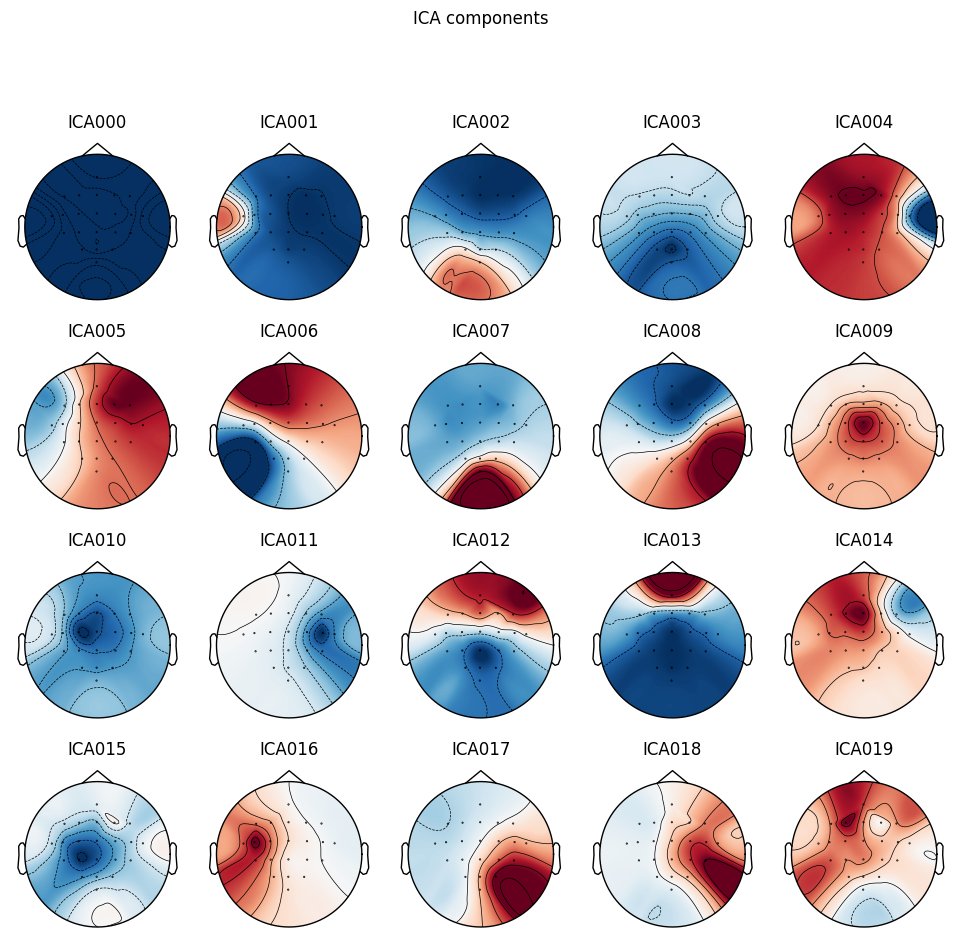

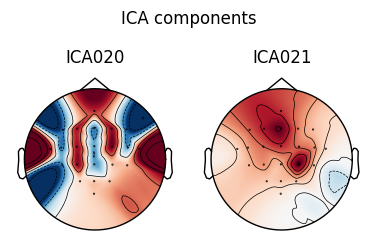

Creating RawArray with float64 data, n_channels=25, n_times=1349697
    Range : 0 ... 1349696 =      0.000 ...  5398.784 secs
Ready.


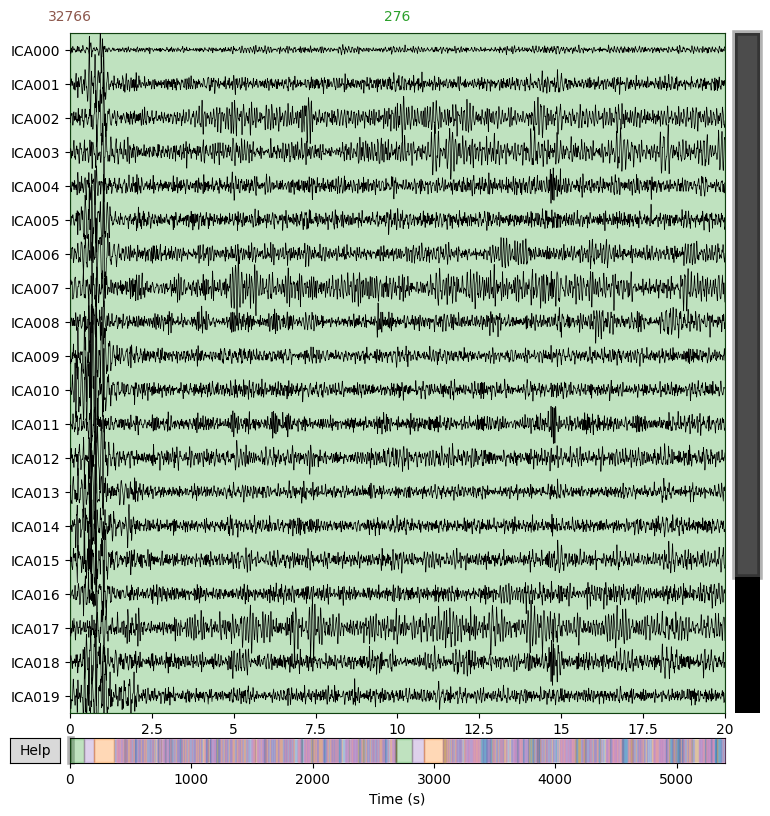

Using EOG channels: EOG-left, EOG-central, EOG-right
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 2500 samples (10.000 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.9s


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 2500 samples (10.000 s)

... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 2500 sam

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.9s


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 2500 samples (10.000 s)

... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 2500 sam

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.9s


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 2500 samples (10.000 s)



In [ ]:


ica = ICA(n_components=22, random_state=97, max_iter=800)
ica.fit(raw_fil )
ica.plot_components()

ica.plot_sources(raw_fil)
eog_indices, eog_scores = ica.find_bads_eog(raw_fil, ch_name=['EOG-left', 'EOG-central', 'EOG-right'])
ica.exclude = eog_indices



In [ ]:
Epoch.ch_names

['Fz',
 'FC3',
 'FC1',
 'FCz',
 'FC2',
 'FC4',
 'C5',
 'C3',
 'C1',
 'Cz',
 'C2',
 'C4',
 'C6',
 'CP3',
 'CP1',
 'CPz',
 'CP2',
 'CP4',
 'P1',
 'Pz',
 'P2',
 'POz',
 'EOG-left',
 'EOG-central',
 'EOG-right']

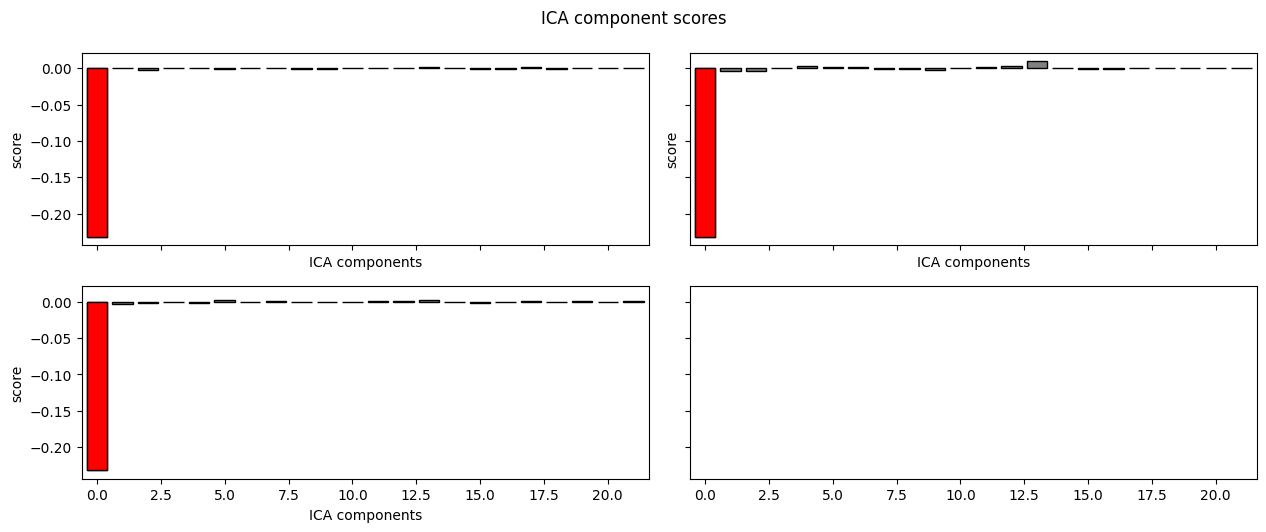

    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
1345 matching events found
No baseline correction applied
0 projection items activated


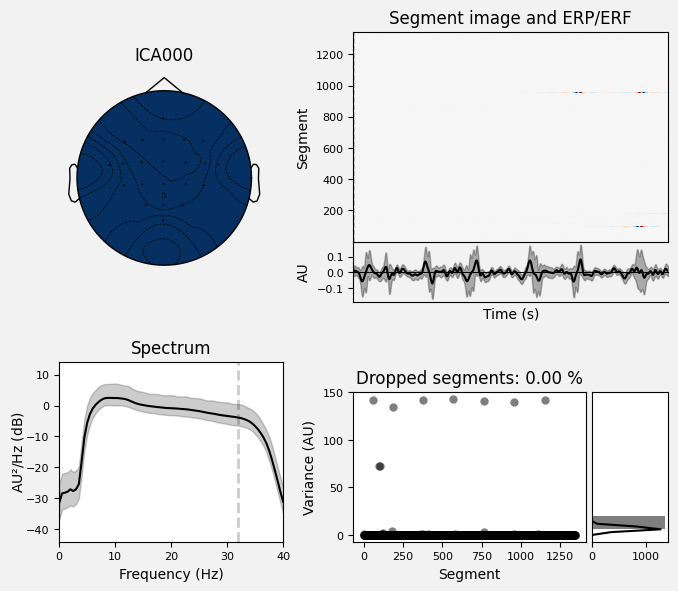

[<Figure size 700x600 with 6 Axes>]

In [ ]:
ica.plot_scores(eog_scores)
ica.plot_properties(raw_fil, picks=eog_indices)

In [ ]:
raw_fil = ica.apply(raw_fil, exclude=ica.exclude)

Applying ICA to Raw instance
    Transforming to ICA space (22 components)
    Zeroing out 1 ICA component
    Projecting back using 22 PCA components


In [ ]:
# Define the event_id dictionary only for task-related events
event_id = {
    'Cue onset left': 7,
    'Cue onset right': 8
}

# Load events
events, event_id_map = mne.events_from_annotations(raw_fil)
# Filter out the events you're interested in
task_events = events[(events[:, 2] == event_id['Cue onset left']) | (events[:, 2] == event_id['Cue onset right'])]
print(task_events.shape)

epochs = mne.Epochs(raw_fil, task_events, event_id=event_id, tmin=-0.5, tmax=4,
                    proj=True, baseline=None, preload=True,
                    event_repeated='merge')


Used Annotations descriptions: ['1023', '1072', '276', '277', '32766', '768', '769', '770', '771', '772']
(144, 3)
Not setting metadata
144 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 144 events and 1126 original time points ...
0 bad epochs dropped


Applying baseline correction (mode: mean)
Not setting metadata
144 matching events found
No baseline correction applied
0 projection items activated
combining channels using "mean"


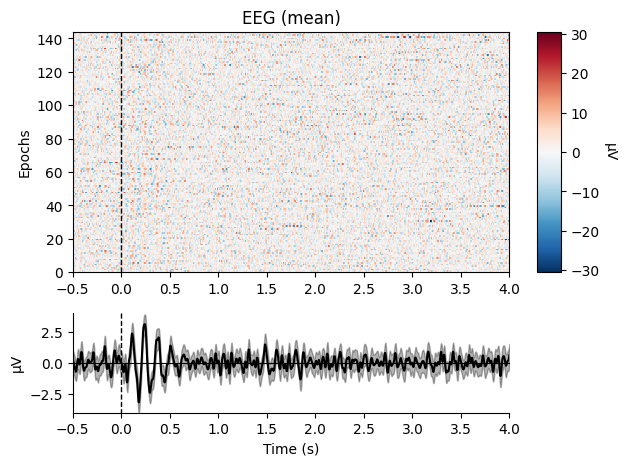

<ipython-input-62-5d73a249033b>:9: FutureWarning: The current default events=None is deprecated and will change to events=True in MNE 1.6. Set events=False to suppress this warning.
  epochs[1].plot(n_epochs=1, block=True)


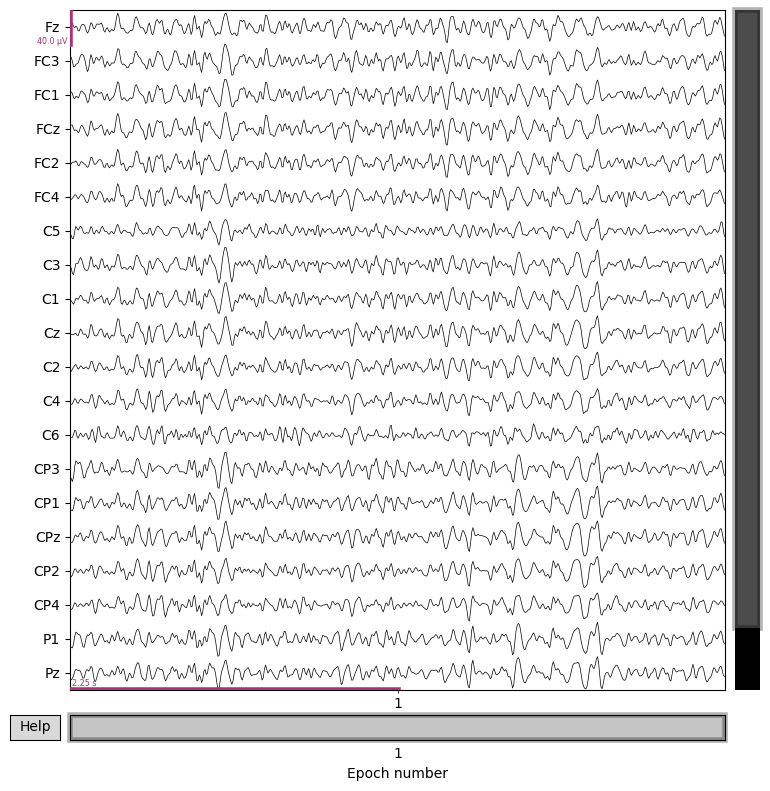

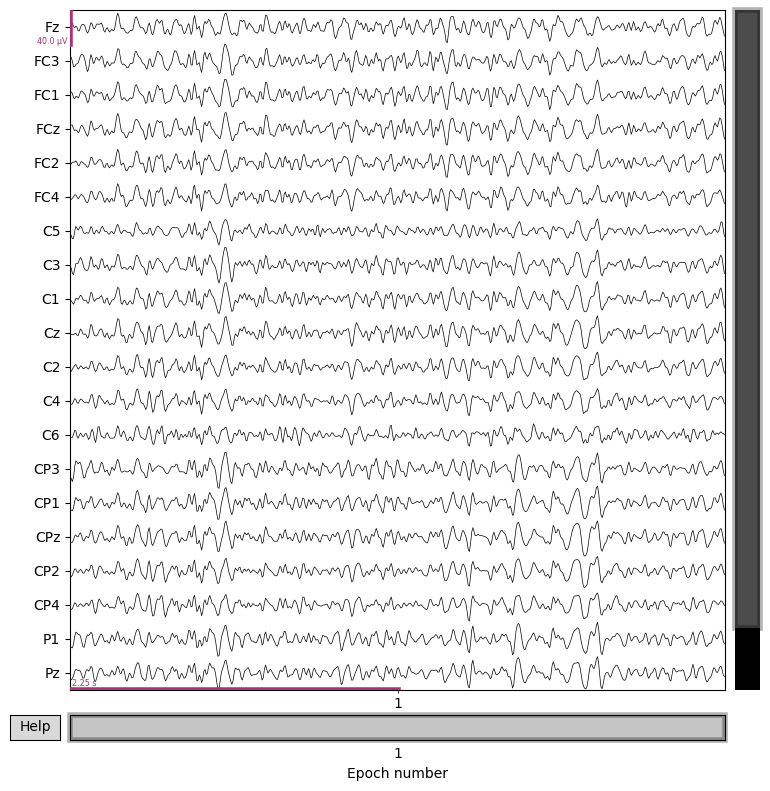

In [ ]:
# Define your baseline period
baseline = (None, 0)  # This will take the period from the beginning of your epoch to time 0

# Apply baseline correction
epochs.apply_baseline(baseline)

# Visualize the epochs to confirm the baseline correction
epochs.plot_image(combine='mean')
epochs[1].plot(n_epochs=1, block=True)

<ipython-input-63-eb42351c7b24>:4: FutureWarning: The current default events=None is deprecated and will change to events=True in MNE 1.6. Set events=False to suppress this warning.
  Epoch[1].plot(n_epochs=1, block=True)


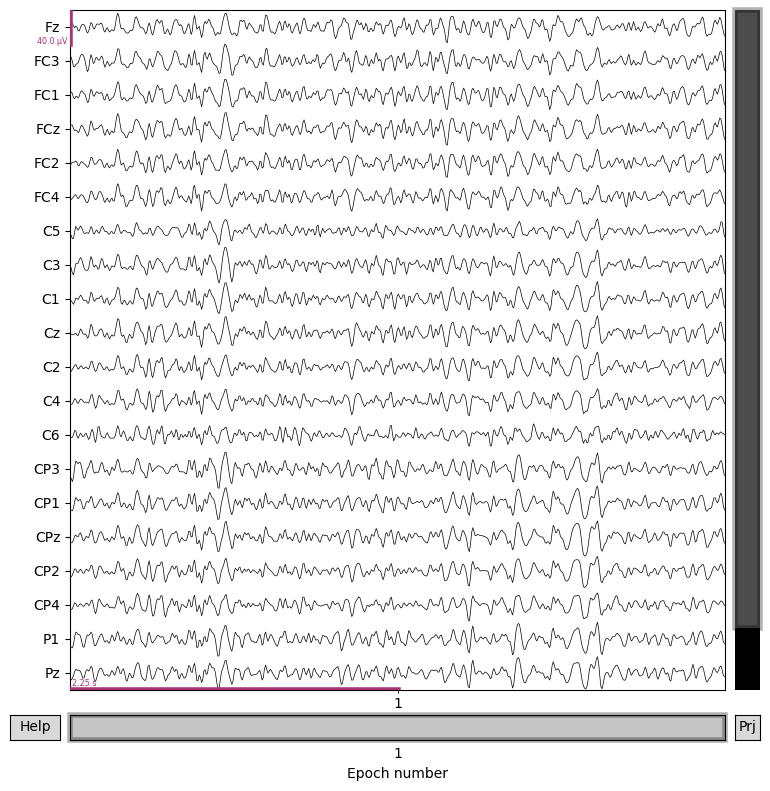

In [ ]:
# Epoch = epochs.copy().set_eeg_reference('average', projection=True)

# Plot the re-referenced data
Epoch[1].plot(n_epochs=1, block=True)

# Extracting data and converting to (samples, features) format
X = Epoch.get_data()
y = Epoch.events[:, -1]  # The column containing the event cod

In [ ]:
X_new = X[:,:22,:]
print(np.shape(X_new))

(288, 22, 1126)


In [ ]:
# Define the event_id dictionary only for task-related events
Event_id = {
    'Cue onset left': 7,
    'Cue onset right': 8
}

r = raw.filter(7., 32., fir_design='firwin', skip_by_annotation='edge')
Events, Event_id_map = mne.events_from_annotations(r)
# Filter out the events you're interested in
task_events = Events[(Events[:, 2] == Event_id['Cue onset left']) | (Events[:, 2] == Event_id['Cue onset right'])]
print(task_events.shape)

Epochx = mne.Epochs(r, task_events, event_id=event_id, tmin=-0.5, tmax=4,
                    proj=True, baseline=None, preload=True,
                    event_repeated='merge')


NameError: ignored

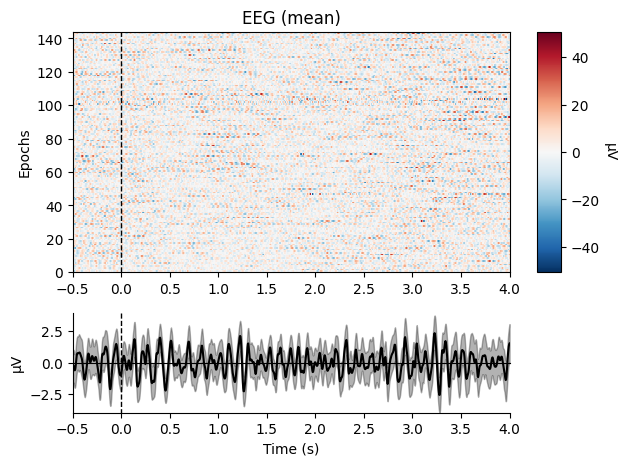

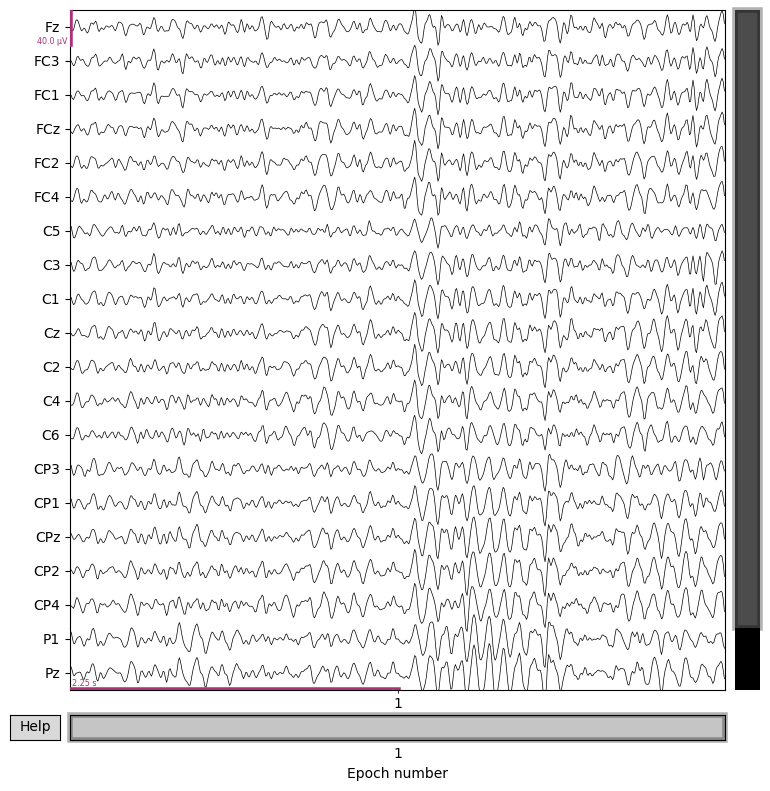

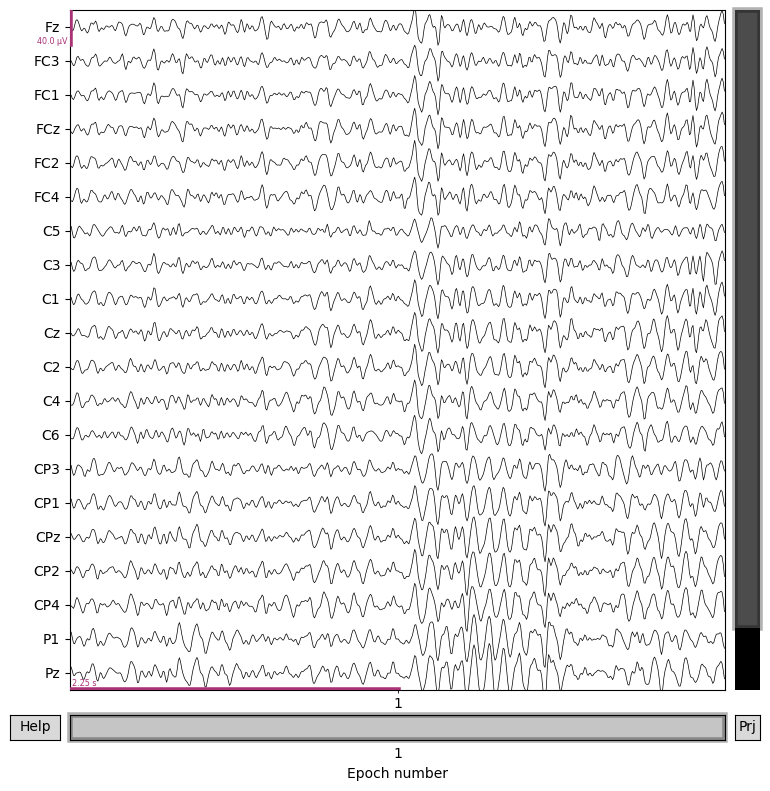

(144, 22, 1126)


In [ ]:
# Define your baseline period
baseline = (None, 0)  # This will take the period from the beginning of your epoch to time 0

# Apply baseline correction
Epochx.apply_baseline(baseline)

# Visualize the epochs to confirm the baseline correction
Epochx.plot_image(combine='mean')
Epochx[1].plot(n_epochs=1, block=True)
epochx = Epochx.copy().set_eeg_reference('average', projection=True)

# Plot the re-referenced data
epochx[1].plot(n_epochs=1, block=True)

# Extracting data and converting to (samples, features) format
x = epochx.get_data()
yy = epochx.events[:, -1]
X_n = x[:,:22,:]
print(np.shape(X_n))

In [ ]:

yy = label_encoder.fit_transform(y)

x_train, x_test, Y_train, Y_test = train_test_split(X_n,yy, test_size=0.2, stratify=yy)

NameError: ignored

In [ ]:
import numpy as np
import torch
from torch.utils.data import TensorDataset, DataLoader
from sklearn.model_selection import train_test_split

# Print the shapes of X_n and yy to verify
print("Shape of X_new:", np.shape(X_n))  # Expected output: (144, 22, 1126)
print("Shape of y:", np.shape(yy))       # Expected output: (144,)

in_channels = 1
num_electrodes = 22
chunk_size = 1126  # Adjusted to match the actual size of the third dimension

# Correctly reshape X_n
X_n_reshaped = X_n.reshape(-1, in_channels, num_electrodes, chunk_size)

# Proceed with creating the TensorDataset and DataLoader
x_tensor = torch.tensor(X_n_reshaped, dtype=torch.float32)
Y_tensor = torch.tensor(yy, dtype=torch.long)

dataset = TensorDataset(x_tensor, Y_tensor)
Train_dataset, Test_dataset = train_test_split(dataset, test_size=0.3, random_state=42)
Train_loader = DataLoader(Train_dataset, batch_size=10, shuffle=True)
Test_loader = DataLoader(Test_dataset, batch_size=10, shuffle=False)


print(next(iter(Train_loader))[0].shape)


Shape of X_new: (144, 22, 1126)
Shape of y: (144,)
torch.Size([10, 1, 22, 1126])


In [ ]:
import torch.optim as optim
from torch.optim.lr_scheduler import StepLR
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
optimizer = optim.Adam(model.parameters(), lr=0.008)
scheduler = StepLR(optimizer, step_size=12, gamma=0.08)

criterion = torch.nn.CrossEntropyLoss()

train_accuracies = []
test_accuracies = []
best_accuracy = 0.0
best_model = None


num_epochs = 100
for epoch in range(num_epochs):
    model.train()
    train_correct = 0
    train_total = 0
    for inputs, labels in Train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        _, predicted = torch.max(outputs.data, 1)
        train_total += labels.size(0)
        train_correct += (predicted == labels).sum().item()

    train_accuracy = 100 * train_correct / train_total
    train_accuracies.append(train_accuracy)


    model.eval()
    test_correct = 0
    test_total = 0
    with torch.no_grad():
        for inputs, labels in Test_loader:
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            test_total += labels.size(0)
            test_correct += (predicted == labels).sum().item()

    test_accuracy = 100 * test_correct / test_total
    test_accuracies.append(test_accuracy)

    # Save best model
    if test_accuracy > best_accuracy:
        best_accuracy = test_accuracy
        best_model = model.state_dict()  # Saving the model state_dict


    scheduler.step()

    print(f"Epoch {epoch+1}/{num_epochs}, Train Accuracy: {train_accuracy:.2f}%, Test Accuracy: {test_accuracy:.2f}%")


torch.save(best_model, '//content/dataset/best_model.pth')

plt.figure(figsize=(10, 5))
plt.plot(train_accuracies, label='Training Accuracy')
plt.plot(test_accuracies, label='Testing Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy Curve')
plt.show()


RuntimeError: ignored

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from mne.decoding import CSP
from sklearn.metrics import classification_report, accuracy_score

In [ ]:
import torch
from torch.utils.data import TensorDataset, DataLoader
from torch.nn import functional as F
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
# from torcheeg.models import FBCNet

In [ ]:
!pip install -q torcheeg

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.2/188.2 kB 4.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 299.2/299.2 kB 14.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.6/44.6 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 230.8/230.8 kB 18.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 805.2/805.2 kB 40.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.1/71.1 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 776.3/776.3 kB 39.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 88.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.7/55.7 kB 6.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 55.2 MB/s eta 0:00:00


ValueError: ignored

In [ ]:
from sklearn.preprocessing import LabelEncoder


label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)


In [ ]:
print(y)

[1 0 0 1 1 0 0 0 1 1 0 0 0 1 0 1 1 0 1 0 1 1 1 0 0 0 1 0 0 1 0 0 1 0 1 1 0
 1 0 0 1 0 1 1 1 1 1 0 1 0 0 0 1 1 0 1 0 1 0 1 1 1 0 0 1 0 1 1 0 0 1 0 1 0
 0 1 0 0 0 1 1 1 1 0 1 1 1 0 0 0 0 0 1 0 1 1 0 1 0 0 1 1 1 0 1 1 1 1 1 0 1
 1 0 0 0 0 0 0 1 0 0 1 1 0 1 1 1 1 1 0 0 0 0 1 1 0 0 0 1 1 0 0 1 0 0 1 1 0
 1 0 1 1 0 1 0 0 1 0 0 0 0 1 0 1 1 0 1 1 1 0 0 1 1 0 0 0 1 1 0 0 0 1 0 1 1
 0 1 0 1 1 1 0 0 0 1 0 0 1 0 0 1 0 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 0 0 0 1 1
 0 1 0 1 0 1 1 1 0 0 1 0 1 1 0 0 1 0 1 0 0 1 0 0 0 1 1 1 1 0 1 1 1 0 0 0 0
 0 1 0 1 1 0 1 0 0 1 1 1 0 1 1 1 1 1 0 1 1 0 0 0 0 0 0 1 0]


In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from mne.decoding import CSP
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import accuracy_score
import numpy as np

# Convert your data to (samples, features) format if not already
X_train = np.array(X_train)  # Assuming X_train is your epochs data in numpy format
X_test = np.array(X_test)    # Same for X_test
y_train_encoded = np.array(y_train)  # And y_train
y_test_encoded = np.array(y_test)  # And y_test_encoded

# Define the CSP component
csp = CSP(n_components=4, reg='shrunk',log=True, norm_trace=False)

# Assemble a classifier using the pipeline
lda = LinearDiscriminantAnalysis()
clf = Pipeline([('CSP', csp), ('LDA', lda)])

# Use Stratified K-Folds cross-validator
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Fit the model on the training data
clf.fit(X_train, y_train_encoded)

# Evaluate the model on the training data using cross-validation
scores = cross_val_score(clf, X_train, y_train, cv=cv, n_jobs=-1)

# Now evaluate it on the test set
y_pred = clf.predict(X_test)
test_score = accuracy_score(y_test_encoded, y_pred)

# Printing the results
print(f"Classification accuracy on training set: {np.mean(scores):.2f}")
print(f"Classification accuracy on test set: {test_score:.2f}")
print(f"Chance level: {max(np.mean(y_test), 1 - np.mean(y_test)):.2f}")

# Fit CSP on full dataset for visualization (optional)
csp.fit_transform(X_train, y_train_encoded)

# If you need to plot CSP patterns, you would need an Info object from an MNE Epochs structure
# This code assumes you have an MNE Info object called 'info'
csp.plot_patterns(info, ch_type='eeg', units='Patterns (AU)', size=1.5)

Computing rank from data with rank=None
    Using tolerance 4.3e-05 (2.2e-16 eps * 22 dim * 8.8e+09  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating covariance using SHRUNK
Done.
Computing rank from data with rank=None
    Using tolerance 4.2e-05 (2.2e-16 eps * 22 dim * 8.7e+09  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating covariance using SHRUNK
Done.
Classification accuracy on training set: 0.66
Classification accuracy on test set: 0.59
Chance level: 0.50
Computing rank from data with rank=None
    Using tolerance 4.3e-05 (2.2e-16 eps * 22 dim * 8.8e+09  max singular value)
    Estimated rank (mag): 22
    MAG: rank 22 computed from 22 data channels with 0 projectors
Reducing data rank from 22 -> 22
Estimating covariance using SHRUNK
Done.
Computing rank from dat

array([[-0.69021542, -0.90462155, -0.51289569, -0.40642518],
       [-0.56517638, -0.81768365, -0.52118728, -0.57024232],
       [-0.30711891, -1.00116103, -0.66892965, -0.78883606],
       [-0.59388383, -0.80921227, -0.63868828, -0.8383245 ],
       [-0.42491114, -0.78171883, -0.75849086, -0.55192454],
       [-1.14575793, -0.88507935, -0.91515319, -1.08934466],
       [-0.34016448, -0.81633816, -0.61687994, -0.57191802],
       [-0.53419379, -0.85541815, -0.54794322, -0.52009896],
       [-1.34165718, -1.25061849, -1.36083713, -1.24178359],
       [-0.79633892, -0.15452657, -0.04860625, -0.92837874],
       [-0.95945258, -0.99294194, -1.03166584, -0.82782465],
       [-1.29323938, -0.95932188, -1.15838073, -1.10300161],
       [-0.91831578, -0.72854972, -0.30560971, -0.76131135],
       [-0.13378034, -0.18472775,  0.08213939, -0.63974857],
       [-0.92394356, -0.74925401, -0.95483775, -0.75381828],
       [-0.99202061, -0.73215123, -0.54027235, -0.84914975],
       [-1.12977923, -1.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_new,y, test_size=0.2, stratify=y)

NameError: ignored

In [ ]:
print("Shape of X_new:", np.shape(X_new))  # Expected output: (1296, 22, 876)
print("Shape of y:", np.shape(y))         # Expected output: (1296,)


in_channels = 1
num_electrodes = 22
chunk_size = 876


X_new_reshaped = X_new.reshape(-1, in_channels, num_electrodes, chunk_size)

X_tensor = torch.tensor(X_new_reshaped, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.long)

dataset = TensorDataset(X_tensor, y_tensor)
train_dataset, test_dataset = train_test_split(dataset, test_size=0.3, random_state=42)
train_loader = DataLoader(train_dataset, batch_size=10, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=10, shuffle=False)

Shape of X_new: (1296, 22, 876)
Shape of y: (1296,)


Epoch 1/100, Train Accuracy: 55.79%, Test Accuracy: 47.56%
Epoch 2/100, Train Accuracy: 60.09%, Test Accuracy: 47.56%
Epoch 3/100, Train Accuracy: 57.11%, Test Accuracy: 47.56%
Epoch 4/100, Train Accuracy: 55.46%, Test Accuracy: 47.56%
Epoch 5/100, Train Accuracy: 56.56%, Test Accuracy: 47.56%
Epoch 6/100, Train Accuracy: 54.47%, Test Accuracy: 47.56%
Epoch 7/100, Train Accuracy: 54.47%, Test Accuracy: 47.56%
Epoch 8/100, Train Accuracy: 56.56%, Test Accuracy: 65.04%
Epoch 9/100, Train Accuracy: 57.55%, Test Accuracy: 47.56%
Epoch 10/100, Train Accuracy: 57.11%, Test Accuracy: 47.56%
Epoch 11/100, Train Accuracy: 57.11%, Test Accuracy: 47.56%
Epoch 12/100, Train Accuracy: 55.35%, Test Accuracy: 47.56%
Epoch 13/100, Train Accuracy: 63.95%, Test Accuracy: 49.36%
Epoch 14/100, Train Accuracy: 64.72%, Test Accuracy: 61.95%
Epoch 15/100, Train Accuracy: 65.49%, Test Accuracy: 66.32%
Epoch 16/100, Train Accuracy: 67.14%, Test Accuracy: 52.44%
Epoch 17/100, Train Accuracy: 65.93%, Test Accura

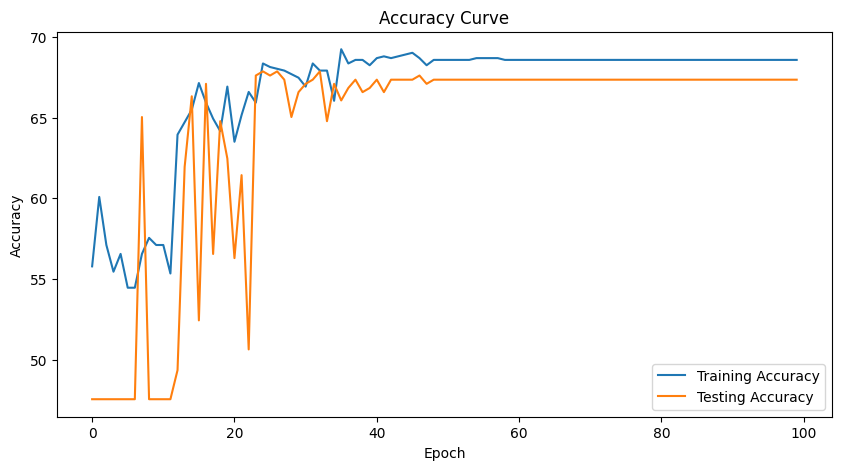

In [ ]:
import torch.optim as optim
from torch.optim.lr_scheduler import StepLR
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
optimizer = optim.Adam(model.parameters(), lr=0.008)
scheduler = StepLR(optimizer, step_size=12, gamma=0.08)

criterion = torch.nn.CrossEntropyLoss()

train_accuracies = []
test_accuracies = []
best_accuracy = 0.0
best_model = None


num_epochs = 100
for epoch in range(num_epochs):
    model.train()
    train_correct = 0
    train_total = 0
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        _, predicted = torch.max(outputs.data, 1)
        train_total += labels.size(0)
        train_correct += (predicted == labels).sum().item()

    train_accuracy = 100 * train_correct / train_total
    train_accuracies.append(train_accuracy)


    model.eval()
    test_correct = 0
    test_total = 0
    with torch.no_grad():
        for inputs, labels in test_loader:
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            test_total += labels.size(0)
            test_correct += (predicted == labels).sum().item()

    test_accuracy = 100 * test_correct / test_total
    test_accuracies.append(test_accuracy)

    # Save best model
    if test_accuracy > best_accuracy:
        best_accuracy = test_accuracy
        best_model = model.state_dict()  # Saving the model state_dict


    scheduler.step()

    print(f"Epoch {epoch+1}/{num_epochs}, Train Accuracy: {train_accuracy:.2f}%, Test Accuracy: {test_accuracy:.2f}%")


torch.save(best_model, '//content/dataset/best_model.pth')

plt.figure(figsize=(10, 5))
plt.plot(train_accuracies, label='Training Accuracy')
plt.plot(test_accuracies, label='Testing Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy Curve')
plt.show()


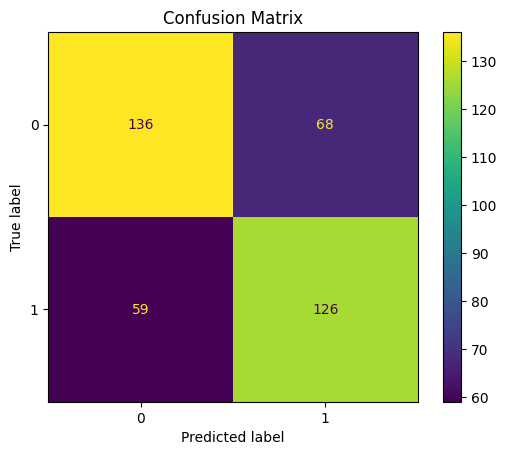

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

model.eval()
all_labels = []
all_predictions = []

# No need to track gradients for this evaluation
with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        all_labels.extend(labels.cpu().numpy())
        all_predictions.extend(predicted.cpu().numpy())

# Compute the confusion matrix
cm = confusion_matrix(all_labels, all_predictions)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

plt.title('Confusion Matrix')
plt.show()


In [ ]:
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_selection import mutual_info_classif, SelectKBest


lowcut = 7
highcut = 32
fs = 250
interval = 4

filtered_data = {}
for start in np.arange(lowcut, highcut, step=interval):
    band = "{:02d}_{:02d}".format(start, start+interval)
    filtered_data[band] = butter_bandpass_filter(X, start, start+interval, fs)

# Apply CSP to each band to get spatial filters and features
CSP_data = {}
for band in filtered_data:
    CSP_data[band] = {}
    CSP_data[band]['W'] = spatial_filter(*decompose_S(*compute_S(compute_cov(filtered_data[band]), white_matrix(*decompose_cov(compute_cov(filtered_data[band]))))))

# Prepare the feature vectors for classification
features = np.hstack([feat_vector(compute_Z(CSP_data[band]['W'], filtered_data[band], m=2)) for band in filtered_data])

# Select the most informative features using Mutual Information
X_selected = SelectKBest(mutual_info_classif, k=4).fit_transform(features, y)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Train an SVM classifier
svm = SVC(gamma='scale')
svm.fit(X_train, y_train)

# Evaluate the classifier
train_accuracy = svm.score(X_train, y_train) * 100
test_accuracy = svm.score(X_test, y_test) * 100
print(f"Train Accuracy: {train_accuracy:.2f}%")
print(f"Test Accuracy: {test_accuracy:.2f}%")

# If you want to perform cross-validation on the training set
cv_scores = cross_val_score(svm, X_train, y_train, cv=5)
print(f"Cross-validation scores: {cv_scores*100}")


In [ ]:
import numpy as np
import torch
import torch.nn as nn
import torchvision.models as models
from sklearn.model_selection import train_test_split
from sklearn.covariance import EmpiricalCovariance
import pywt


In [ ]:
def compute_whitening_matrix(covariance_matrix):
    eigvals, eigvecs = np.linalg.eigh(covariance_matrix)
    # Adding a small constant to eigenvalues to avoid division by zero
    epsilon = 1e-10
    D = np.diag(1.0 / np.sqrt(eigvals + epsilon))
    P = np.dot(eigvecs, np.dot(D, eigvecs.T))
    return P




In [ ]:
def compute_csp(data, labels):
    e_cov = EmpiricalCovariance()
    c1 = data[labels == 0]
    c2 = data[labels == 1]

    # Compute covariance matrices
    e_cov.fit(np.concatenate(c1, axis=0))
    cov1 = e_cov.covariance_
    e_cov.fit(np.concatenate(c2, axis=0))
    cov2 = e_cov.covariance_

    # Composite covariance and whitening
    composite_covariance = cov1 + cov2
    P = compute_whitening_matrix(composite_covariance)




    # Eigenvalue decomposition
    S1 = np.dot(P, np.dot(cov1, P.T))
    eigvals, eigvecs = np.linalg.eigh(S1)

    # Select filters (here 4 filters)
    filters = eigvecs[:, [0, 1, -2, -1]]
    return filters
def apply_csp(data, filters):
    # data shape: (epochs, channels, time)
    # filters shape: (channels, num_filters)
    # Applying CSP requires data to be in shape (epochs, time, channels)
    data = data.transpose(0, 2, 1)
    return np.array([np.dot(epoch, filters) for epoch in data])





In [ ]:
def apply_csp(data, filters):
    # data shape: (epochs, channels, time)
    # filters shape: (channels, num_filters)
    # Applying CSP requires data to be in shape (epochs, time, channels)
    data = data.transpose(0, 2, 1)
    return np.array([np.dot(epoch, filters) for epoch in data])

In [ ]:
def compute_cwt(data, scales, wavelet_name='cmor'):
    # Applying CWT using PyWavelets
    coefficients, frequencies = pywt.cwt(data, scales, wavelet_name, axis=-1)
    return np.abs(coefficients)
def apply_cwt(data, scales):
    # Apply CWT to each epoch and CSP component
    return np.array([compute_cwt(epoch, scales) for epoch in data])


In [ ]:
filters = compute_csp(X_new, y)
print(filters.shape)
X_csp = apply_csp(X_new, filters)

# Define scales for CWT
scales = np.arange(1, 31)  # example scales

# Apply CWT
X_cwt = apply_cwt(X_csp, scales)
X_cwt = np.transpose(X_cwt, (0, 3, 1, 2))



(22, 4)


/usr/local/lib/python3.10/dist-packages/pywt/_cwt.py:117: FutureWarning: Wavelets from the family cmor, without parameters specified in the name are deprecated. The name should takethe form cmorB-C where B and C are floats representing the bandwidth frequency and center frequency, respectively (example: cmor1.5-1.0).
  wavelet = DiscreteContinuousWavelet(wavelet)


In [ ]:
X_cwt = np.transpose(X_cwt, (0, 3,1,2))
X_cwt =

(288, 6, 30, 1126)

In [ ]:
def compute_csp(data, labels, num_filters=4):
    # Separate data by class
    class_0 = data[labels == 0]
    class_1 = data[labels == 1]

    # Compute average covariance matrices
    cov_0 = np.mean([np.cov(epoch) for epoch in class_0], axis=0)
    cov_1 = np.mean([np.cov(epoch) for epoch in class_1], axis=0)

    # Composite covariance matrix
    composite_cov = cov_0 + cov_1

    # Eigenvalue decomposition for whitening matrix
    eigvals, eigvecs = np.linalg.eigh(composite_cov)
    # Avoid division by zero
    eigvals[eigvals < 0] = 0
    D = np.diag(1.0 / np.sqrt(eigvals))
    whitening_matrix = np.dot(eigvecs, np.dot(D, eigvecs.T))

    # Transform the covariance matrices
    S_0 = np.dot(whitening_matrix, np.dot(cov_0, whitening_matrix.T))
    S_1 = np.dot(whitening_matrix, np.dot(cov_1, whitening_matrix.T))

    # Eigenvalue decomposition of transformed matrices
    eigvals_0, eigvecs_0 = np.linalg.eigh(S_0)
    eigvals_1, eigvecs_1 = np.linalg.eigh(S_1)

    # Select filters: for instance, 2 from each class covariance
    filters = np.concatenate((eigvecs_0[:, :num_filters // 2], eigvecs_1[:, :num_filters // 2]), axis=1)

    return filters




(22, 4)


In [ ]:
# # Convert to PyTorch tensors
# X_tensor = torch.tensor(X_cwt, dtype=torch.float32)
# y_tensor = torch.tensor(y, dtype=torch.long)

# # Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_tensor, y_tensor, test_size=0.2, random_state=42)


NameError: ignored

In [ ]:
# Load pre-trained MobileNet
mobilenet = models.mobilenet_v2(pretrained=True)

# Modify the last layer for binary classification
mobilenet.classifier[1] = nn.Linear(mobilenet.last_channel, 2)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(mobilenet.parameters(), lr=0.001)

# Training loop (simplified)
for epoch in range(num_epochs):
    # Forward pass
    outputs = mobilenet(X_train)
    loss = criterion(outputs, y_train)

    # Backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')


In [ ]:
# Model evaluation (simplified)
with torch.no_grad():
    correct = 0
    total = 0
    outputs = mobilenet(X_test)
    _, predicted = torch.max(outputs.data, 1)
    total += y_test.size(0)
    correct += (predicted == y_test).sum().item()

print(f'Accuracy: {100 * correct / total}%')


C3
Cz
C4
CP1
CPz
CP4


In [ ]:
X_norm.shape

(288, 6, 1126)

In [ ]:
channel_indices = [7, 9, 11, 14, 15, 17]  # Indices of the channels of interest

# Step 1: Channel Selection
X_filtered = X_new[:, channel_indices, :]

In [ ]:
X_norm = (X_filtered - X_filtered.mean(axis=2, keepdims=True)) / X_filtered.std(axis=2, keepdims=True)


In [ ]:
# filters = compute_csp(X_norm, y)
# print(filters.shape)
# X_csp = apply_csp(X_new, filters)

# Define scales for CWT
scales = np.arange(1, 31)  # example scales

# Apply CWT
X_cwt = apply_cwt(X_norm, scales)



/usr/local/lib/python3.10/dist-packages/pywt/_cwt.py:117: FutureWarning: Wavelets from the family cmor, without parameters specified in the name are deprecated. The name should takethe form cmorB-C where B and C are floats representing the bandwidth frequency and center frequency, respectively (example: cmor1.5-1.0).
  wavelet = DiscreteContinuousWavelet(wavelet)


In [ ]:
X_cwt.shape

(288, 30, 6, 1126)

In [ ]:
import numpy as np
import cv2
import torch
import torchvision.models as models
from torch.utils.data import DataLoader, TensorDataset
from torchvision import transforms


cwt_data = X_cwt
labels = y
# Resizing the scalograms to 224x224 using cubic interpolation
resized_scalograms = np.empty((cwt_data.shape[0], cwt_data.shape[1], 224, 224))
for i in range(cwt_data.shape[0]):
    for j in range(cwt_data.shape[1]):
        resized_scalograms[i, j] = cv2.resize(cwt_data[i, j], (224, 224), interpolation=cv2.INTER_CUBIC)

# Stack the scalograms to create RGB images
# First RGB set: electrodes C3, Cz, C4 (indices 0, 1, 2)
# Second RGB set: electrodes P3, Pz, P4 (indices 3, 4, 5)
rgb_images_set1 = resized_scalograms[:, 0:3]
rgb_images_set2 = resized_scalograms[:, 3:6]

# Combine both sets to form a single dataset
rgb_images = np.vstack((rgb_images_set1, rgb_images_set2))

# Assuming labels is an array of shape (288,) with the class labels
# Duplicate the labels for each set of RGB images
labels = np.concatenate((labels, labels))

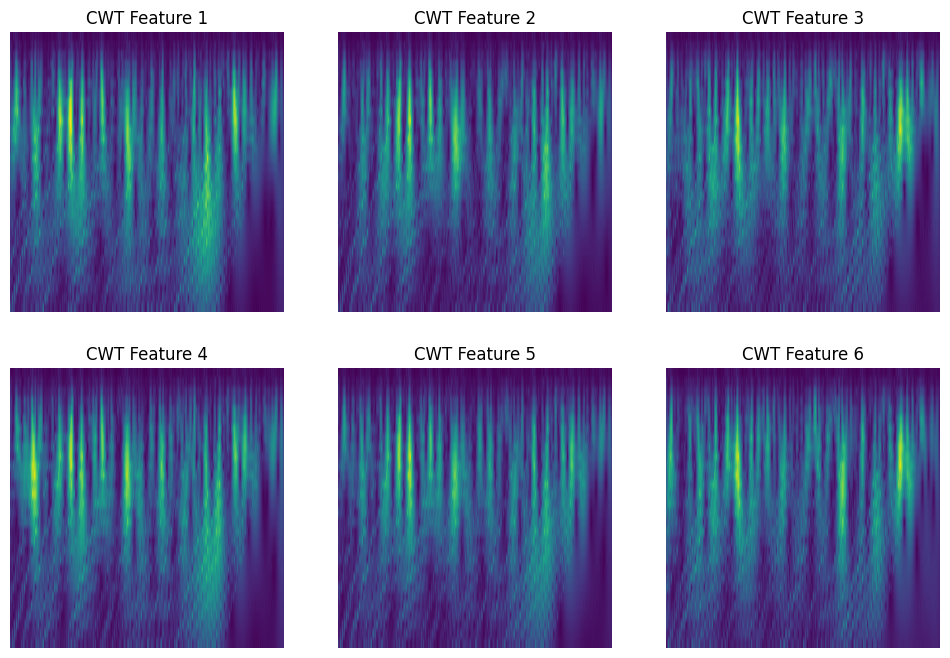

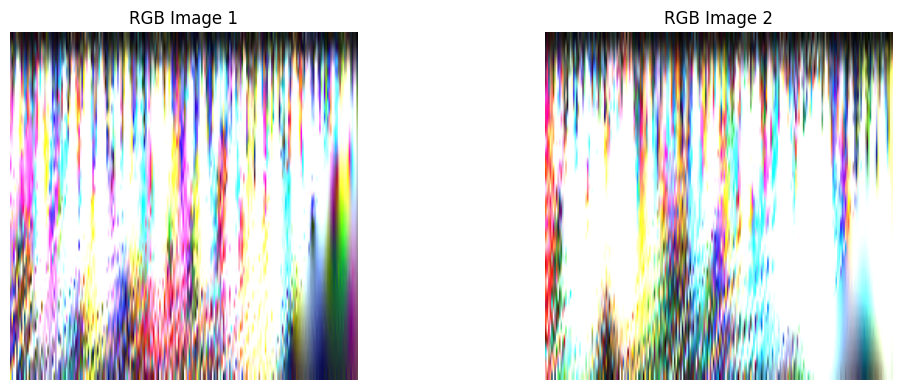

In [112]:
import matplotlib.pyplot as plt

# Replace these with your actual data for a single epoch
cwt_data = X_cwt[0]
rgb_image1 = rgb_images[0]
rgb_image2 = rgb_images[1]

# Create subplots for CWT features
fig, axs_cwt = plt.subplots(2, 3, figsize=(12, 8))

# Plot CWT features
for i in range(6):
    row = i // 3
    col = i % 3
    axs_cwt[row, col].imshow(cwt_data[i], cmap='viridis', aspect='auto')
    axs_cwt[row, col].set_title(f'CWT Feature {i + 1}')
    axs_cwt[row, col].axis('off')

# Create subplots for RGB images
fig, axs_rgb = plt.subplots(1, 2, figsize=(12, 4))

# Plot RGB images
axs_rgb[0].imshow(np.transpose(rgb_image1, (1, 2, 0)))
axs_rgb[0].set_title('RGB Image 1')
axs_rgb[0].axis('off')

axs_rgb[1].imshow(np.transpose(rgb_image2, (1, 2, 0)))
axs_rgb[1].set_title('RGB Image 2')
axs_rgb[1].axis('off')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


In [115]:

print(X_csp.shape)
# num_epochs, num_channels, T = X_csp .shape

# # Create subplots for each channel
# fig, axs = plt.subplots(num_channels, figsize=(12, 8))

# # Plot eCSP transformed data for each channel
# for channel_idx in range(num_channels):
#     axs[channel_idx].set_title(f'Channel {channel_idx + 1}')
#     axs[channel_idx].set_xlabel('Time')
#     axs[channel_idx].set_ylabel('Amplitude')
#     axs[channel_idx].plot(X_csp [0, channel_idx, :], label=f'Epoch {1}')

#     axs[channel_idx].legend(loc='upper right')

# # Adjust spacing between subplots
# plt.tight_layout()

# # Show the plot
# plt.show()

(288, 1126, 4)


In [ ]:
tensor_x = torch.Tensor(rgb_images)
tensor_y = torch.Tensor(labels)

# # Create a dataset and dataloader
# dataset = TensorDataset(tensor_x, tensor_y)
# dataloader = DataLoader(dataset, batch_size=20, shuffle=True)

ValueError: ignored

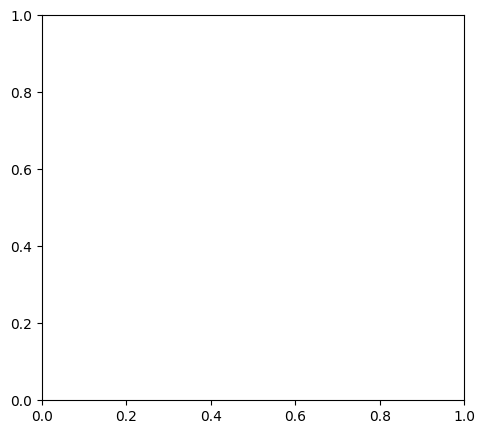

In [124]:

# Plot training and test loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(range(num_epochs), train_losses, label='Train Loss')
plt.plot(range(num_epochs), test_losses, label='Test Loss')
plt.title('Loss over epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot training and test accuracy
plt.subplot(1, 2, 2)
plt.plot(range(num_epochs), train_accuracies, label='Train Accuracy')
plt.plot(range(num_epochs), test_accuracies, label='Test Accuracy')
plt.title('Accuracy over epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [123]:
# Initialize variables to keep track of the best model
best_accuracy = 0.0
best_model_state_dict = None

# Training loop with lr_scheduler and model saving
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    for images, labels in train_dataset:
        images, labels = images.to(device, dtype=torch.float), labels.to(device, dtype=torch.long)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    train_losses.append(running_loss / len(train_dataset))
    train_accuracies.append(100 * correct / total)

    model.eval()
    running_loss = 0.0
    correct = 0
    total = 0

    with torch.no_grad():
        for images, labels in test_dataset:
            images, labels = images.to(device, dtype=torch.float), labels.to(device, dtype=torch.long)

            outputs = model(images)
            loss = criterion(outputs, labels)

            running_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        test_losses.append(running_loss / len(test_dataset))
        test_accuracies.append(100 * correct / total)

        # Step the learning rate scheduler
        scheduler.step()

        # Check if this is the best model so far
        if test_accuracies[-1] > best_accuracy:
            best_accuracy = test_accuracies[-1]
            best_model_state_dict = model.state_dict()

        print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_losses[-1]:.4f}, Train Accuracy: {train_accuracies[-1]:.2f}%, '
              f'Test Loss: {test_losses[-1]:.4f}, Test Accuracy: {test_accuracies[-1]:.2f}%')

# Save the best model
if best_model_state_dict is not None:
    torch.save(best_model_state_dict, 'best_model.pth')

Epoch [1/10], Train Loss: 0.8787, Train Accuracy: 49.78%, Test Loss: 1.8500, Test Accuracy: 51.72%
Epoch [2/10], Train Loss: 0.7370, Train Accuracy: 53.26%, Test Loss: 0.7437, Test Accuracy: 54.31%
Epoch [3/10], Train Loss: 0.5535, Train Accuracy: 72.17%, Test Loss: 0.6242, Test Accuracy: 64.66%
Epoch [4/10], Train Loss: 0.3628, Train Accuracy: 86.09%, Test Loss: 0.6221, Test Accuracy: 68.97%
Epoch [5/10], Train Loss: 0.1779, Train Accuracy: 96.74%, Test Loss: 0.5857, Test Accuracy: 72.41%
Epoch [6/10], Train Loss: 0.1408, Train Accuracy: 98.04%, Test Loss: 0.5808, Test Accuracy: 74.14%
Epoch [7/10], Train Loss: 0.1181, Train Accuracy: 98.26%, Test Loss: 0.5734, Test Accuracy: 73.28%
Epoch [8/10], Train Loss: 0.1170, Train Accuracy: 99.13%, Test Loss: 0.5786, Test Accuracy: 73.28%
Epoch [9/10], Train Loss: 0.1253, Train Accuracy: 98.48%, Test Loss: 0.5796, Test Accuracy: 74.14%
Epoch [10/10], Train Loss: 0.1151, Train Accuracy: 98.48%, Test Loss: 0.5741, Test Accuracy: 72.41%


In [122]:
from torch.optim import lr_scheduler

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(tensor_x, tensor_y, test_size=0.2, random_state=42)

# Create data loaders
batch_size = 20
train_dataset = DataLoader(TensorDataset(X_train, y_train), batch_size=batch_size, shuffle=True)
test_dataset = DataLoader(TensorDataset(X_test, y_test), batch_size=batch_size, shuffle=False)

# Load pre-trained MobileNetV2 and modify the classifier
model = models.mobilenet_v2(pretrained=True)
model.classifier[1] = nn.Linear(model.last_channel, 2)  # Assuming binary classification

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.002)
scheduler = lr_scheduler.StepLR(optimizer, step_size=2, gamma=0.1)


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.models as models
from torch.utils.data import DataLoader, random_split
from torchvision.transforms import Compose, Normalize, ToTensor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt



Accuracy: 72.41%
Classification Report:
              precision    recall  f1-score   support

         0.0       0.69      0.79      0.73        56
         1.0       0.77      0.67      0.71        60

    accuracy                           0.72       116
   macro avg       0.73      0.73      0.72       116
weighted avg       0.73      0.72      0.72       116

ROC AUC Score: 0.78


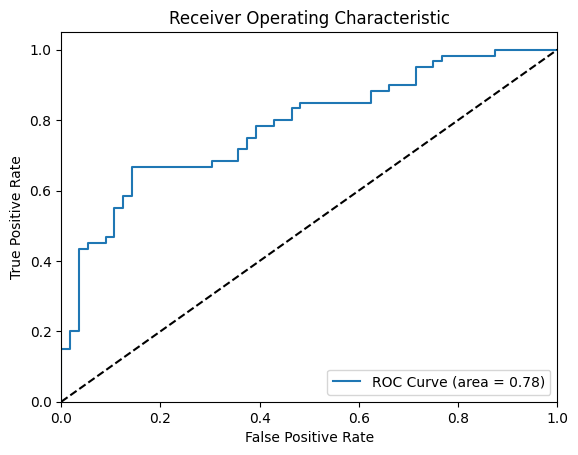

In [125]:
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Place the model in evaluation mode
model.eval()

# Lists to store true labels, predictions, and probabilities
true_labels = []
predictions = []
probabilities = []

with torch.no_grad():
    for images, labels in test_dataset:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)

        _, predicted = torch.max(outputs.data, 1)

        true_labels.extend(labels.cpu().numpy())
        predictions.extend(predicted.cpu().numpy())
        probs = torch.nn.functional.softmax(outputs, dim=1)
        probabilities.extend(probs[:, 1].cpu().numpy())  # Assuming binary classification

# Calculate accuracy
accuracy = accuracy_score(true_labels, predictions)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Classification report
print('Classification Report:')
print(classification_report(true_labels, predictions))

# ROC AUC and curve calculation
if len(set(true_labels)) == 2:
    auc_score = roc_auc_score(true_labels, probabilities)
    print(f'ROC AUC Score: {auc_score:.2f}')

    fpr, tpr, _ = roc_curve(true_labels, probabilities)

    plt.plot(fpr, tpr, label=f'ROC Curve (area = {auc_score:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()
else:
    print("ROC AUC is not applicable for multi-class classification directly.")

In [136]:
!pip install torchsummary


In [144]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.models as models
from torchsummary import summary

# Load pre-trained MobileNetV2
model = models.mobilenet_v2(pretrained=True)

# Freeze all layers except the last one
for param in model.parameters():
    param.requires_grad = False

# Modify the last layer for 6-class classification
model.classifier[1] = nn.Linear(model.last_channel, 2)  # Assuming 6-class classification

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.classifier[1].parameters(), lr=0.001)  # Only optimize the last layer

# Print the summary
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)
summary(model, input_size=(3, 224, 224))  # Adjust input size as needed



----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 32, 112, 112]             864
       BatchNorm2d-2         [-1, 32, 112, 112]              64
             ReLU6-3         [-1, 32, 112, 112]               0
            Conv2d-4         [-1, 32, 112, 112]             288
       BatchNorm2d-5         [-1, 32, 112, 112]              64
             ReLU6-6         [-1, 32, 112, 112]               0
            Conv2d-7         [-1, 16, 112, 112]             512
       BatchNorm2d-8         [-1, 16, 112, 112]              32
  InvertedResidual-9         [-1, 16, 112, 112]               0
           Conv2d-10         [-1, 96, 112, 112]           1,536
      BatchNorm2d-11         [-1, 96, 112, 112]             192
            ReLU6-12         [-1, 96, 112, 112]               0
           Conv2d-13           [-1, 96, 56, 56]             864
      BatchNorm2d-14           [-1, 96,

In [145]:
# Initialize variables to keep track of the best model
best_accuracy = 0.0
best_model_state_dict = None

# Training loop with lr_scheduler and model saving
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    for images, labels in train_dataset:
        images, labels = images.to(device, dtype=torch.float), labels.to(device, dtype=torch.long)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    train_losses.append(running_loss / len(train_dataset))
    train_accuracies.append(100 * correct / total)

    model.eval()
    running_loss = 0.0
    correct = 0
    total = 0

    with torch.no_grad():
        for images, labels in test_dataset:
            images, labels = images.to(device, dtype=torch.float), labels.to(device, dtype=torch.long)

            outputs = model(images)
            loss = criterion(outputs, labels)

            running_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        test_losses.append(running_loss / len(test_dataset))
        test_accuracies.append(100 * correct / total)

        # Step the learning rate scheduler
        scheduler.step()

        # Check if this is the best model so far
        if test_accuracies[-1] > best_accuracy:
            best_accuracy = test_accuracies[-1]
            best_model_state_dict = model.state_dict()

        print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_losses[-1]:.4f}, Train Accuracy: {train_accuracies[-1]:.2f}%, '
              f'Test Loss: {test_losses[-1]:.4f}, Test Accuracy: {test_accuracies[-1]:.2f}%')

# Save the best model
if best_model_state_dict is not None:
    torch.save(best_model_state_dict, 'Best_model.pth')

Epoch [1/10], Train Loss: 0.7496, Train Accuracy: 50.43%, Test Loss: 0.6989, Test Accuracy: 52.59%
Epoch [2/10], Train Loss: 0.6757, Train Accuracy: 54.78%, Test Loss: 0.6872, Test Accuracy: 55.17%
Epoch [3/10], Train Loss: 0.6543, Train Accuracy: 58.04%, Test Loss: 0.6721, Test Accuracy: 63.79%
Epoch [4/10], Train Loss: 0.6162, Train Accuracy: 65.87%, Test Loss: 0.6678, Test Accuracy: 66.38%
Epoch [5/10], Train Loss: 0.6099, Train Accuracy: 66.74%, Test Loss: 0.6751, Test Accuracy: 55.17%
Epoch [6/10], Train Loss: 0.5961, Train Accuracy: 66.30%, Test Loss: 0.7315, Test Accuracy: 61.21%
Epoch [7/10], Train Loss: 0.6075, Train Accuracy: 66.30%, Test Loss: 0.6842, Test Accuracy: 54.31%
Epoch [8/10], Train Loss: 0.5722, Train Accuracy: 70.87%, Test Loss: 0.6762, Test Accuracy: 63.79%
Epoch [9/10], Train Loss: 0.5661, Train Accuracy: 70.43%, Test Loss: 0.8068, Test Accuracy: 55.17%
Epoch [10/10], Train Loss: 0.5730, Train Accuracy: 69.13%, Test Loss: 0.7325, Test Accuracy: 54.31%


In [148]:
from torchvision.models import mobilenet_v2

# Create a MobileNetV2 model with the same architecture as the trained model
model = mobilenet_v2(pretrained=False)
for param in model.parameters():
    param.requires_grad = False
model.classifier[1] = nn.Linear(model.last_channel, 2)  # Assuming 2-class classification

# Load the trained weights into the model
model.load_state_dict(torch.load('Best_model.pth'))

# Prepare the model for quantization
model = model.to('cpu')  # Move the model to the CPU (quantization doesn't work well on GPU)
model.eval()  # Set the model in evaluation mode

# Apply quantization
quantized_model = torch.quantization.quantize_dynamic(model, dtype=torch.qint8)

# Print the quantized model's parameter sizes
for name, param in quantized_model.named_parameters():
    print(f"Layer: {name}, Size: {param.size()}")

# Optionally, save the quantized model
torch.save(quantized_model.state_dict(), 'Quantized_model.pth')

summary(quantized_model, input_size=(3, 224, 224))


Layer: features.0.0.weight, Size: torch.Size([32, 3, 3, 3])
Layer: features.0.1.weight, Size: torch.Size([32])
Layer: features.0.1.bias, Size: torch.Size([32])
Layer: features.1.conv.0.0.weight, Size: torch.Size([32, 1, 3, 3])
Layer: features.1.conv.0.1.weight, Size: torch.Size([32])
Layer: features.1.conv.0.1.bias, Size: torch.Size([32])
Layer: features.1.conv.1.weight, Size: torch.Size([16, 32, 1, 1])
Layer: features.1.conv.2.weight, Size: torch.Size([16])
Layer: features.1.conv.2.bias, Size: torch.Size([16])
Layer: features.2.conv.0.0.weight, Size: torch.Size([96, 16, 1, 1])
Layer: features.2.conv.0.1.weight, Size: torch.Size([96])
Layer: features.2.conv.0.1.bias, Size: torch.Size([96])
Layer: features.2.conv.1.0.weight, Size: torch.Size([96, 1, 3, 3])
Layer: features.2.conv.1.1.weight, Size: torch.Size([96])
Layer: features.2.conv.1.1.bias, Size: torch.Size([96])
Layer: features.2.conv.2.weight, Size: torch.Size([24, 96, 1, 1])
Layer: features.2.conv.3.weight, Size: torch.Size([24]